# Lending Club dataset

## algorithm: Gradient Boosting
## library: sklearn


In [1]:
import pandas as pd
import numpy as np

loans = pd.read_csv("lending-club-data.csv")
loans.columns

C:\Users\abido\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

### Preprocessing

In [2]:
# safe_loans =  1 => safe
# safe_loans = -1 => risky
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans', axis = 1)

target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

loans = loans[[target] + features].dropna()

loans = pd.get_dummies(loans)

import json

with open("module-8-assignment-1-train-idx.json") as json_file:
    train_idx = json.load(json_file)
    
with open("module-8-assignment-1-validation-idx.json") as json_file:
    val_idx = json.load(json_file)

train_data = loans.iloc[train_idx]
val_data = loans.iloc[val_idx]

print(train_data.shape)
print(val_data.shape)
train_data.head()

(37219, 45)
(9284, 45)


,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
1,-1,0.8,1,1,1.00,2.39320,0.0,1.0,5.0,1,...,0,0,0,0,0,0,0,0,0,0
6,-1,0.4,0,5,5.55,4.57170,0.0,1.0,2.0,1,...,0,0,0,0,0,0,0,1,0,0
7,-1,1.0,1,1,18.08,9.71600,0.0,1.0,0.0,1,...,0,0,0,0,0,0,1,0,0,0
10,-1,0.2,1,1,10.08,12.21520,0.0,1.0,1.0,1,...,1,0,0,0,0,0,0,0,0,0
12,-1,0.4,0,4,7.06,3.90888,0.0,1.0,2.0,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Converting to numpy
X_train = train_data.drop(target, axis=1).values
Y_train = train_data[target].values

X_val = val_data.drop(target, axis=1).values
Y_val = val_data[target].values

print("Shape of training data: X = {}, Y = {}".format(X_train.shape, Y_train.shape))
print("Shape of validation data: X = {}, Y = {}".format(X_val.shape, Y_val.shape))

Shape of training data: X = (37219, 44), Y = (37219,)
Shape of validation data: X = (9284, 44), Y = (9284,)


## Model

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
import sklearn

**Model with depth=6, num_estimators=5**

In [6]:
model_5 = GradientBoostingClassifier(max_depth=6, n_estimators=5)
model_5.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### Creating sample data for testing:

In [7]:
validation_safe_loans = val_data[val_data[target] == 1]
validation_risky_loans = val_data[val_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,1,0.2,0,3,29.44,6.30496,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,0.6,1,1,12.19,13.49520,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
24,-1,0.4,0,3,13.97,2.96736,3.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
41,-1,1.0,0,11,16.33,1.90524,0.0,1.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Sample Accuracy
sample_preds = model_5.predict(sample_validation_data.drop(target,axis=1).values)
sample_labels = sample_validation_data[target].values
np.sum(np.equal(sample_labels, sample_preds)) / len(sample_labels)

0.75

In [11]:
# alternatively
model_5.score(sample_validation_data.drop(target,axis=1).values, sample_validation_data[target].values)

0.75

In [13]:
# Probabilities
sample_probs = model_5.predict_proba(sample_validation_data.drop(target,axis=1))
sample_probs

array([[0.41642331, 0.58357669],
       [0.46949689, 0.53050311],
       [0.53807792, 0.46192208],
       [0.39591639, 0.60408361]])

In [15]:
# Validation accuracy
model5_acc = model_5.score(X_val,Y_val)
model5_acc

0.6613528651443343

In [16]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

val_preds = model_5.predict(X_val)

tn, fp, fn, tp = confusion_matrix(Y_val, val_preds).ravel()

print("Number of TP = {}\nNumber of FP = {}\nNumber of TN = {}\nNumber of FN = {}\n".format(tp,fp,tn,fn))

Number of TP = 3121
Number of FP = 1653
Number of TN = 3019
Number of FN = 1491



In [17]:
# Cost of mistakes
fn_cost = 10000
fp_cost = 20000

In [19]:
# Cost of the model:
cost = fn * fn_cost + fp * fp_cost
cost

47970000

In [21]:
val_probs = model_5.predict_proba(X_val)[:, 1]
val_data['predictions'] = val_probs
sorted_val_data = val_data.sort_values(by=['predictions'], ascending = False)

C:\Users\abido\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
sorted_val_data.head()

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,predictions
8021,-1,0.4,0,4,12.73,12.167000,0.0,1.0,1.0,1,...,0,0,0,0,0,0,0,0,0,0.673059
34261,1,0.2,0,11,0.74,0.481601,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0.661468
68947,1,0.4,0,11,13.38,7.676000,0.0,1.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0.661468
99626,1,0.4,0,11,2.08,3.825100,0.0,1.0,0.0,1,...,1,0,0,0,0,0,0,0,0,0.661468
69995,1,0.4,0,11,8.73,3.401080,0.0,1.0,4.0,1,...,0,0,0,0,0,0,0,0,0,0.661468


### Training with different number of trees  -- [10, 50, 100, 200, 500]

In [26]:
model_dict = {}

num_trees = [10, 50, 100, 200, 500]


for n in num_trees:
    model_name = "model_" + "{}".format(n)
    model_dict[model_name] = GradientBoostingClassifier(max_depth=6, n_estimators=n)
    model_dict[model_name].fit(X_train, Y_train)
    

In [27]:
accs = []

for key, model in model_dict.items():
    accs.append(model.score(X_val, Y_val))

In [33]:
list(zip(model_dict.keys(), accs))

[('model_10', 0.6660922016372254),
 ('model_50', 0.6844032744506678),
 ('model_100', 0.6889271865575183),
 ('model_200', 0.6859112451529513),
 ('model_500', 0.6908660060318829)]

In [34]:
val_errors = 1 - np.array(accs)

In [35]:
# training set
tr_accs = []
for key, model in model_dict.items():
    tr_accs.append(model.score(X_train, Y_train))

train_errors = 1 - np.array(tr_accs)

In [36]:
list(zip(model_dict.keys(), tr_accs))

[('model_10', 0.6716730702060776),
 ('model_50', 0.7172949300088665),
 ('model_100', 0.7463661033343185),
 ('model_200', 0.7872860635696821),
 ('model_500', 0.8683199441145651)]

### Plotting the results

No handles with labels found to put in legend.


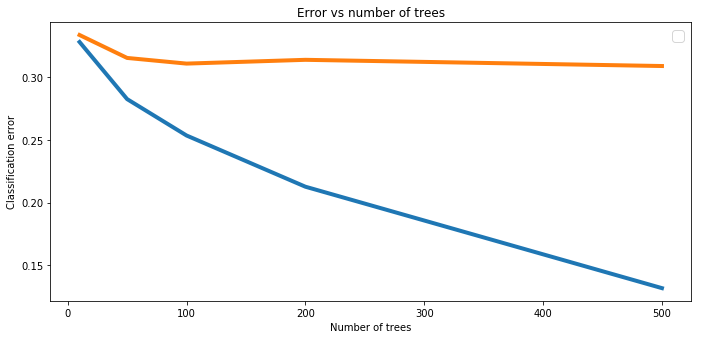

In [38]:
import matplotlib.pyplot as plt

def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

    plt.plot([10, 50, 100, 200, 500], train_errors, linewidth=4.0, label='Training error')
    plt.plot([10, 50, 100, 200, 500], val_errors, linewidth=4.0, label='Validation error')

    
    
make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')